# 模型常用函数

In [3]:
import torch.nn as nn
import torch

## 线性层

用于全连接层，通过矩阵乘法将输入特征映射到输出特征。

参数名	|说明	|默认值
---|---|---
in_features	|输入特征数	|必需
out_features	|输出特征数	|必需
bias	|是否使用偏置	|True

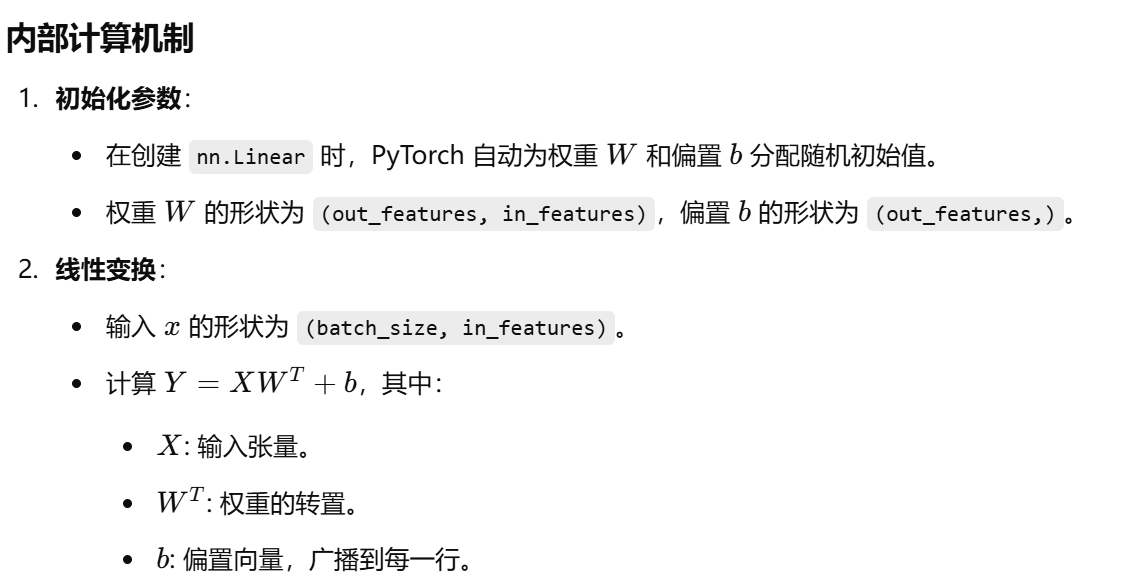

In [5]:
layer = nn.Linear(in_features=128, out_features=64, bias=True)
x = torch.randn(32, 128)  # 输入为 [batch_size, in_features]
output = layer(x)  # 输出为 [batch_size, out_features]
print(output.shape)

torch.Size([32, 64])


In [7]:
# 打印权重
print(layer.weight)

Parameter containing:
tensor([[-0.0099, -0.0117,  0.0377,  ...,  0.0319, -0.0151, -0.0456],
        [ 0.0141, -0.0218,  0.0142,  ..., -0.0290,  0.0385,  0.0606],
        [ 0.0164,  0.0366,  0.0807,  ..., -0.0521,  0.0465,  0.0742],
        ...,
        [-0.0639,  0.0556,  0.0473,  ..., -0.0807,  0.0169,  0.0636],
        [-0.0180, -0.0395, -0.0290,  ..., -0.0338,  0.0361, -0.0396],
        [-0.0552, -0.0318, -0.0229,  ..., -0.0229,  0.0774, -0.0798]],
       requires_grad=True)


In [8]:
# 打印偏置
print(layer.bias)

Parameter containing:
tensor([-0.0115,  0.0432,  0.0647, -0.0826,  0.0877,  0.0673, -0.0250,  0.0431,
         0.0371, -0.0825, -0.0119,  0.0242, -0.0811, -0.0052,  0.0088, -0.0867,
        -0.0505,  0.0158, -0.0063,  0.0168,  0.0514, -0.0155, -0.0228, -0.0699,
         0.0123,  0.0340, -0.0295,  0.0136,  0.0348,  0.0775, -0.0150,  0.0564,
        -0.0377, -0.0371, -0.0029,  0.0797, -0.0503, -0.0814,  0.0471, -0.0075,
        -0.0737,  0.0611,  0.0663,  0.0425,  0.0729, -0.0018, -0.0139, -0.0499,
        -0.0264,  0.0808, -0.0413,  0.0504,  0.0650,  0.0194,  0.0820, -0.0138,
        -0.0652, -0.0591,  0.0134,  0.0698,  0.0686, -0.0670, -0.0051, -0.0319],
       requires_grad=True)


## 卷积层

### 一维卷积层

常用于时间序列或一维数据（如音频、文本）。

参数名	|说明	|默认值
---|---|---|
in_channels	|输入通道数	|必需
out_channels	|输出通道数	|必需
kernel_size	|卷积核大小	|必需
stride	|步幅	|1
padding	|填充大小	|0
dilation	|膨胀系数	|1
groups	|分组数	|1
bias	|是否使用偏置	|True

常见填充策略：
- padding=0：无填充（默认）。
- padding=n：表示在输入的两端各填充 n 个元素。
- padding="same"：自动计算填充使输出长度与输入长度相同。
- padding="valid"：无填充，完全依赖于卷积核。

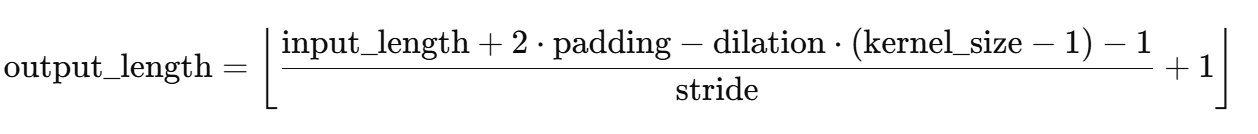
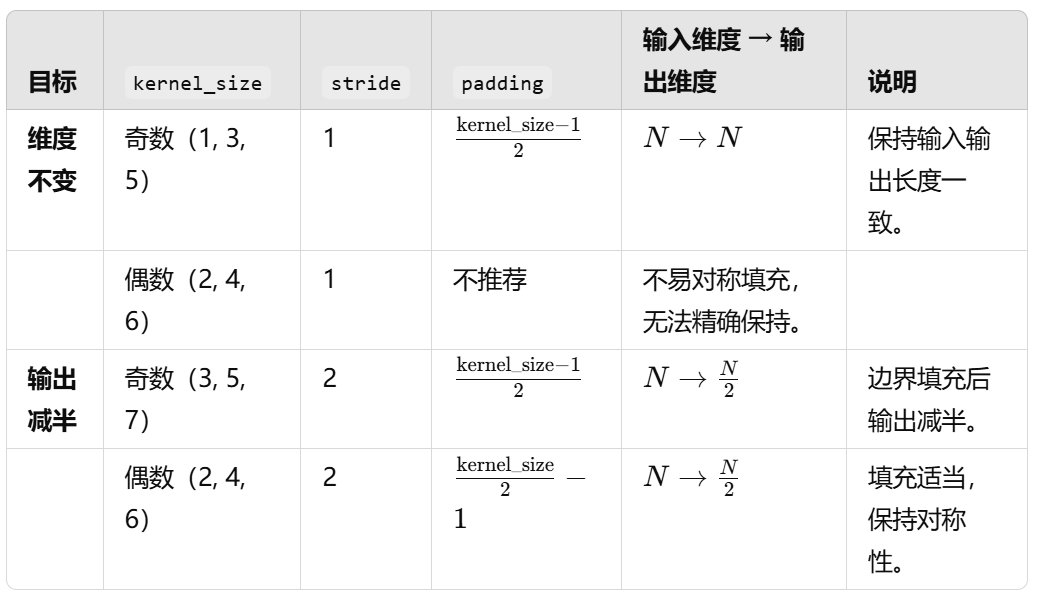

In [12]:
# 输出长度不变
layer = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
x = torch.randn(8, 16, 50)  # 输入为 [batch_size, in_channels, seq_length]
output = layer(x)  # 输出为 [batch_size, out_channels, seq_length]
print(output.shape)

torch.Size([8, 32, 50])


In [13]:
# 输出长度减半
layer = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=4, stride=2, padding=1)
x = torch.randn(8, 16, 50)  # 输入为 [batch_size, in_channels, seq_length]
output = layer(x)  # 输出为 [batch_size, out_channels, seq_length]
print(output.shape)

torch.Size([8, 32, 25])


### 二维卷积层

常用于图像数据处理。

参数	|类型	|默认值	|说明
---|---|---|---|
in_channels	|int	|必须指定	|输入特征图的通道数（如 RGB 图像为 3，灰度图像为 1）。
out_channels	|int	|必须指定	|输出特征图的通道数（卷积后生成的通道数）。
kernel_size	|int 或 tuple	|必须指定	|卷积核的尺寸，可以是单个数值（正方形卷积核）或二维元组（长方形卷积核）。
stride	|int 或 tuple	|1	|卷积操作的步长，可控制特征图缩小的程度。
padding	|int 或 tuple 或 str	|0	|在输入边界填充的大小，可使用 same 自动计算适当的填充以保持输出维度。
padding_mode	|str	|'zeros'	|填充模式，可选 zeros（默认）、reflect、replicate 和 circular。
dilation	|int 或 tuple	|1	|空洞卷积的扩张因子，增加感受野而不增加计算量。
groups	|int	|1	|控制输入和输出通道的连接方式，groups=1 为全连接，groups=C 为深度可分离卷积。
bias	|bool	|True	|是否包含偏置参数，通常 True。
device	|torch.device	|None	|指定计算设备（如 cuda 或 cpu）。
dtype	|torch.dtype	|None	|指定权重的精度类型（如 torch.float32）。

操作	|参数设置	|说明
---|---|---|
标准卷积	|groups=1	|每个输出通道与所有输入通道连接。
深度可分离卷积	|groups=in_channels	|每个输入通道独立卷积。
膨胀卷积	|dilation>1	|增大感受野，减少计算量。
下采样卷积	|stride=2	|特征图尺寸缩小一半。
保持尺寸卷积	|padding='same'	|输入输出尺寸相同（需 PyTorch ≥1.9）。

In [16]:
layer = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
x = torch.randn(8, 3, 32, 32)  # 输入为 [batch_size, in_channels, height, width]
output = layer(x)  # 输出为 [batch_size, out_channels, height, width]
print(output.shape)

torch.Size([8, 16, 32, 32])


In [18]:
layer = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3,3), stride=1, padding=1)
x = torch.randn(8, 3, 32, 32)  # 输入为 [batch_size, in_channels, height, width]
output = layer(x)  # 输出为 [batch_size, out_channels, height, width]
print(output.shape)

torch.Size([8, 16, 32, 32])


## 池化层

### 最大池化

用于提取局部最大特征，减少维度。

参数名	|说明	|默认值
---|---|---|
kernel_size	|池化窗口大小	|必需
stride	|步幅	|kernel_size
padding	|填充大小	|0
dilation	|膨胀系数	|1
return_indices	|是否返回索引（用于反池化）	|False
ceil_mode	|是否使用上取整模式	|False

In [17]:
layer = nn.MaxPool2d(kernel_size=2, stride=2)
x = torch.randn(8, 16, 32, 32)  # 输入为 [batch_size, channels, height, width]
output = layer(x)  # 输出维度减半：[batch_size, channels, height/2, width/2]
print(output.shape)

torch.Size([8, 16, 16, 16])


### 平均池化

用于提取局部平均特征。

参数名	|说明	|默认值
---|---|---|
kernel_size	|池化窗口大小	|必需
stride	|步幅	|kernel_size
padding	|填充大小	|0
ceil_mode	|是否使用上取整模式	|False
count_include_pad	|是否包括填充值	|True

In [19]:
layer = nn.AvgPool2d(kernel_size=2, stride=2)
x = torch.randn(8, 16, 32, 32)  # 输入为 [batch_size, channels, height, width]
output = layer(x)  # 输出维度减半：[batch_size, channels, height/2, width/2]
print(output.shape)

torch.Size([8, 16, 16, 16])


## 归一化层

### 批归一化

BatchNorm是对一个batch-size样本内的每个特征分别做归一化。

参数名	|说明	|默认值
---|---|---|
num_features	|通道数	|必需

In [20]:
layer = nn.BatchNorm2d(num_features=16)
x = torch.randn(8, 16, 32, 32)
output = layer(x)
print(output.shape)

torch.Size([8, 16, 32, 32])


### 层归一化

LayerNorm是分别对每个样本的所有特征做归一化。

参数名	|说明	|默认值
---|---|---|
normalized_shape	|被归一化的特征大小	|必需

In [21]:
layer = nn.LayerNorm(normalized_shape=(128,))
x = torch.randn(8, 128)  # 输入为 [batch_size, features]
output = layer(x)
print(output.shape)

torch.Size([8, 128])


## Dropout 层

Dropout 的核心思想是在每次前向传播时随机“丢弃”一部分神经元，使这些神经元的输出暂时设为 0。用于防止过拟合。

In [22]:
layer = nn.Dropout(p=0.5)  # 以 50% 概率随机丢弃神经元
x = torch.randn(8, 128)
output = layer(x)
print(output.shape)

torch.Size([8, 128])
